In [17]:
import ccxt
import pandas as pd
from sklearn import preprocessing
import pprint
import datetime
import plotly.graph_objects as go
import numpy as np

print('ccxt version', ccxt.__version__)


# From timestamp to Datetime
def convert_from_ms(value):
    return datetime.datetime.fromtimestamp(value)


exchange = ccxt.binance()
markets = exchange.load_markets()
print(f"numero mercati: {len(markets)}")


ccxt version 2.4.18
numero mercati: 2131


In [18]:
symbol = 'BTC/EUR'
filtered = []
for s in exchange.symbols:
    if s.startswith('BTC'):
        filtered.append(s)

In [19]:
ohlcv = exchange.fetch_ohlcv(symbol, '4h', limit=1000)

In [20]:
df = pd.DataFrame(ohlcv, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
# df['datetime']=pd.to_datetime(df['timestamp'],unit='ms')
df['date_parsed'] = (df['timestamp'] / 1000).apply(convert_from_ms)
df['avg'] = df['high'] - df['low'] / 2

#bollinger
param_up=2.5
param_down=3
df['sma']=df.close.rolling(20).mean()
df['stdev']=df.close.rolling(20).std()
df['bbup']=df.sma.shift(1) + param_up*df.stdev
df['bbdown']=df.sma.shift(1) - param_down*df.stdev

df['avg'] = df['high'] - df['low'] / 2

df['sell'] = (df.high>df.bbup)
df['buy'] = (df.low<df.bbdown)
df['position_sell'] = False
df['position_buy'] = False
df['stato']=None
#df['position'] = np.where( (df.buy==True), 1,0)
#df.position.fillna(method='ffill' , inplace=True)
df


,timestamp,open,high,low,close,volume,date_parsed,avg,sma,stdev,bbup,bbdown,sell,buy,position_sell,position_buy,stato
0,1656820800000,18473.64,18597.98,18011.50,18377.86,330.04671,2022-07-03 06:00:00,9592.230,NaN,NaN,NaN,NaN,False,False,False,False,None
1,1656835200000,18377.79,18391.12,18178.44,18319.21,201.72188,2022-07-03 10:00:00,9301.900,NaN,NaN,NaN,NaN,False,False,False,False,None
2,1656849600000,18320.37,18354.71,18205.44,18274.99,183.48512,2022-07-03 14:00:00,9251.990,NaN,NaN,NaN,NaN,False,False,False,False,None
3,1656864000000,18274.43,18763.76,18243.71,18712.49,236.91553,2022-07-03 18:00:00,9641.905,NaN,NaN,NaN,NaN,False,False,False,False,None
4,1656878400000,18714.88,18849.00,18408.16,18510.15,247.36362,2022-07-03 22:00:00,9644.920,NaN,NaN,NaN,NaN,False,False,False,False,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1671148800000,16311.80,16371.78,16299.42,16355.38,335.18676,2022-12-16 01:00:00,8222.070,16573.2490,198.331627,17061.741567,15970.917619,False,False,False,False,None
996,1671163200000,16355.27,16437.38,16286.90,16433.92,379.90982,2022-12-16 05:00:00,8293.930,16578.6950,192.567839,17054.668596,15995.545484,False,False,False,False,None
997,1671177600000,16434.12,16443.77,15940.00,16013.39,1122.04752,2022-12-16 09:00:00,8473.770,16565.5945,221.087563,17131.413908,15915.432311,False,False,False,False,None
998,1671192000000,16013.53,16063.96,15902.50,15991.63,721.07127,2022-12-16 13:00:00,8112.710,16551.6175,247.891830,17185.324076,15821.919009,False,False,False,False,None


In [21]:
stato='None'
for i in range (0,len(df)):
    if (stato =='None') & (df.loc[i,'buy']==True):
        df.loc[i,'position_buy']=True
        stato='buy'
    if (stato=='buy') & (df.loc[i,'sell']==True):
        df.loc[i,'position_sell']=True
        stato='None'
    df.loc[i,'stato']=stato

df[45:100]

,timestamp,open,high,low,close,volume,date_parsed,avg,sma,stdev,bbup,bbdown,sell,buy,position_sell,position_buy,stato
45,1657468800000,20507.36,20675.06,20275.97,20553.28,319.08563,2022-07-10 18:00:00,10537.075,21156.0630,346.675915,22000.301789,20093.584254,False,False,False,False,None
46,1657483200000,20555.95,20812.17,20325.62,20514.69,232.58279,2022-07-10 22:00:00,10649.360,21155.0480,348.614300,22027.598749,20110.220101,False,False,False,False,None
47,1657497600000,20520.05,20520.05,20165.07,20236.33,205.54144,2022-07-11 02:00:00,10437.515,21093.8870,396.405866,22146.062665,19965.830402,False,False,False,False,None
48,1657512000000,20226.50,20291.91,20078.76,20211.54,183.83038,2022-07-11 06:00:00,10252.530,21042.0975,440.511845,22195.166613,19772.351464,False,False,False,False,None
49,1657526400000,20211.42,20394.42,20185.00,20290.86,272.45973,2022-07-11 10:00:00,10301.920,20967.7405,435.236720,22130.189301,19736.387339,False,False,False,False,None
50,1657540800000,20291.44,20618.18,20144.30,20261.78,423.81371,2022-07-11 14:00:00,10546.030,20902.5955,438.679543,22064.439359,19651.701870,False,False,False,False,None
51,1657555200000,20263.79,20580.00,20243.99,20414.83,351.10818,2022-07-11 18:00:00,10458.005,20860.2620,443.052529,22010.226824,19573.437912,False,False,False,False,None
52,1657569600000,20419.03,20466.74,19789.47,19864.33,351.96108,2022-07-11 22:00:00,10572.005,20774.2020,461.539514,22014.110785,19475.643458,False,False,False,False,None
53,1657584000000,19863.77,19930.50,19698.46,19879.51,291.03943,2022-07-12 02:00:00,10081.270,20696.1135,474.667761,21960.871402,19350.198718,False,False,False,False,None
54,1657598400000,19880.40,20025.48,19579.81,19700.16,371.97960,2022-07-12 06:00:00,10235.575,20621.0685,508.102639,21966.370098,19171.805583,False,False,False,False,None


In [22]:
# apply normalization techniques on Column 1
column = 'close'
column_dest = 'norm_close'
df[column_dest] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())

df

,timestamp,open,high,low,close,volume,date_parsed,avg,sma,stdev,bbup,bbdown,sell,buy,position_sell,position_buy,stato,norm_close
0,1656820800000,18473.64,18597.98,18011.50,18377.86,330.04671,2022-07-03 06:00:00,9592.230,NaN,NaN,NaN,NaN,False,False,False,False,None,0.342213
1,1656835200000,18377.79,18391.12,18178.44,18319.21,201.72188,2022-07-03 10:00:00,9301.900,NaN,NaN,NaN,NaN,False,False,False,False,None,0.335647
2,1656849600000,18320.37,18354.71,18205.44,18274.99,183.48512,2022-07-03 14:00:00,9251.990,NaN,NaN,NaN,NaN,False,False,False,False,None,0.330696
3,1656864000000,18274.43,18763.76,18243.71,18712.49,236.91553,2022-07-03 18:00:00,9641.905,NaN,NaN,NaN,NaN,False,False,False,False,None,0.379676
4,1656878400000,18714.88,18849.00,18408.16,18510.15,247.36362,2022-07-03 22:00:00,9644.920,NaN,NaN,NaN,NaN,False,False,False,False,None,0.357024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1671148800000,16311.80,16371.78,16299.42,16355.38,335.18676,2022-12-16 01:00:00,8222.070,16573.2490,198.331627,17061.741567,15970.917619,False,False,False,False,None,0.115788
996,1671163200000,16355.27,16437.38,16286.90,16433.92,379.90982,2022-12-16 05:00:00,8293.930,16578.6950,192.567839,17054.668596,15995.545484,False,False,False,False,None,0.124581
997,1671177600000,16434.12,16443.77,15940.00,16013.39,1122.04752,2022-12-16 09:00:00,8473.770,16565.5945,221.087563,17131.413908,15915.432311,False,False,False,False,None,0.077501
998,1671192000000,16013.53,16063.96,15902.50,15991.63,721.07127,2022-12-16 13:00:00,8112.710,16551.6175,247.891830,17185.324076,15821.919009,False,False,False,False,None,0.075065


<AxesSubplot: >

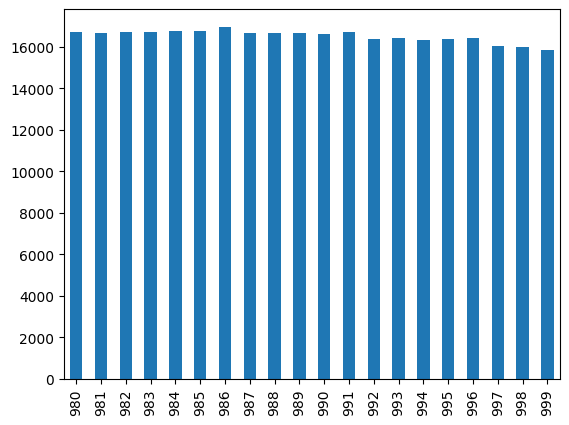

In [23]:
df['close'][-20:].plot(kind = 'bar')

<AxesSubplot: >

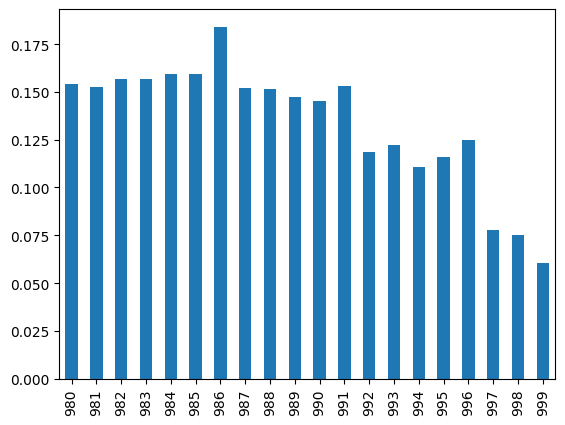

In [24]:
df['norm_close'][-20:].plot(kind = 'bar')

In [25]:
df[df.position_buy==True].bbup.index

Int64Index([137, 175, 282, 325, 351, 393, 435, 579, 645, 735, 736, 768, 841,
            971],
           dtype='int64')

In [26]:
figure=go.Figure()
figure.add_trace(go.Scatter(name='Close', x=df.index, y=df.close, mode='lines', marker_color='#D22975'))
figure.add_trace(go.Scatter(name='Up', x=df.index, y=df.bbup, mode='lines', marker_color='#2D2975'))
figure.add_trace(go.Scatter(name='Down', x=df.index, y=df.bbdown, mode='lines', marker_color='#D29275'))
figure.add_trace(go.Scatter(name='Sell', x=df[df.position_sell==True].index, y=df[df.position_sell==True].close, mode='markers', marker_color='#0000FF'))
figure.add_trace(go.Scatter(name='Buy', x=df[df.position_buy==True].index, y=df[df.position_buy==True].close, mode='markers', marker_color='#00FF00'))


#df.close.plot()
#df.sellscatter(x, y)
#df.bbup.plot()
#df.bbdown.plot(figsize = [15,8]).grid()
figure.show()

<AxesSubplot: >

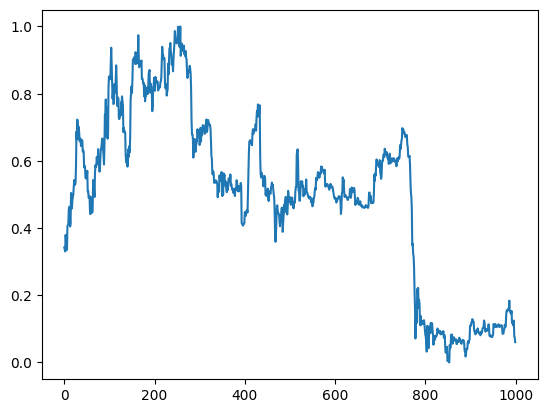

In [27]:
df.norm_close.plot()

<AxesSubplot: >

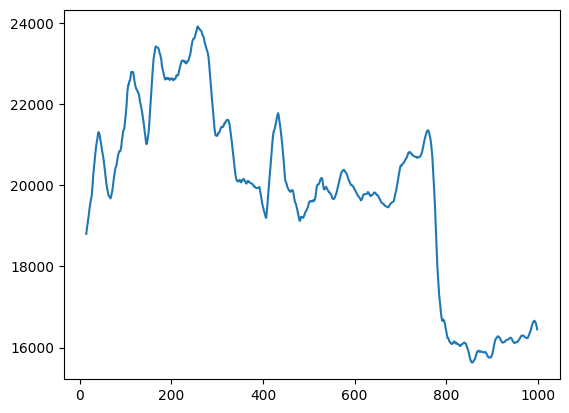

In [28]:
df.close.rolling(15).mean().plot()

<AxesSubplot: >

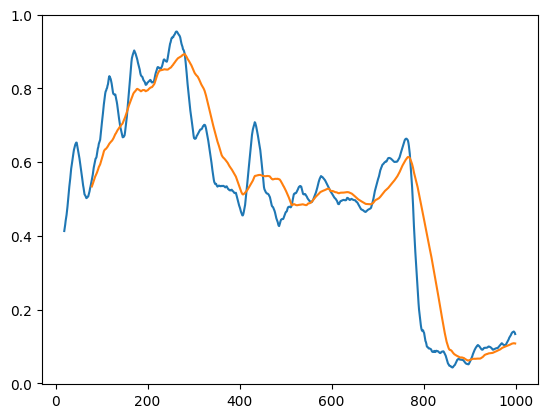

In [29]:
# df['norm_close'].plot()
df.norm_close.rolling(20).mean().plot()
df.norm_close.rolling(80).mean().plot()

In [30]:
df['close'].min()

15321.13

In [31]:
df['close'].max()

24253.37

In [32]:
df

,timestamp,open,high,low,close,volume,date_parsed,avg,sma,stdev,bbup,bbdown,sell,buy,position_sell,position_buy,stato,norm_close
0,1656820800000,18473.64,18597.98,18011.50,18377.86,330.04671,2022-07-03 06:00:00,9592.230,NaN,NaN,NaN,NaN,False,False,False,False,None,0.342213
1,1656835200000,18377.79,18391.12,18178.44,18319.21,201.72188,2022-07-03 10:00:00,9301.900,NaN,NaN,NaN,NaN,False,False,False,False,None,0.335647
2,1656849600000,18320.37,18354.71,18205.44,18274.99,183.48512,2022-07-03 14:00:00,9251.990,NaN,NaN,NaN,NaN,False,False,False,False,None,0.330696
3,1656864000000,18274.43,18763.76,18243.71,18712.49,236.91553,2022-07-03 18:00:00,9641.905,NaN,NaN,NaN,NaN,False,False,False,False,None,0.379676
4,1656878400000,18714.88,18849.00,18408.16,18510.15,247.36362,2022-07-03 22:00:00,9644.920,NaN,NaN,NaN,NaN,False,False,False,False,None,0.357024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1671148800000,16311.80,16371.78,16299.42,16355.38,335.18676,2022-12-16 01:00:00,8222.070,16573.2490,198.331627,17061.741567,15970.917619,False,False,False,False,None,0.115788
996,1671163200000,16355.27,16437.38,16286.90,16433.92,379.90982,2022-12-16 05:00:00,8293.930,16578.6950,192.567839,17054.668596,15995.545484,False,False,False,False,None,0.124581
997,1671177600000,16434.12,16443.77,15940.00,16013.39,1122.04752,2022-12-16 09:00:00,8473.770,16565.5945,221.087563,17131.413908,15915.432311,False,False,False,False,None,0.077501
998,1671192000000,16013.53,16063.96,15902.50,15991.63,721.07127,2022-12-16 13:00:00,8112.710,16551.6175,247.891830,17185.324076,15821.919009,False,False,False,False,None,0.075065
